# Sales

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [25]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Projects\Data-Projects\smartphones.csv')
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400


In [31]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [33]:
df.shape

(980, 26)

In [35]:
df.tail()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400
979,samsung,Samsung Galaxy M52s 5G,24990,74.0,True,False,False,NaN,8.0,NaN,...,60,3,1.0,android,64.0,32.0,1,1024.0,1080,2400


In [37]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


In [39]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [43]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [45]:
nu=df.isnull().sum()
nu[nu>0]

rating                  101
processor_brand          20
num_cores                 6
processor_speed          42
battery_capacity         11
fast_charging           211
num_front_cameras         4
os                       14
primary_camera_front      5
extended_upto           480
dtype: int64

<Axes: >

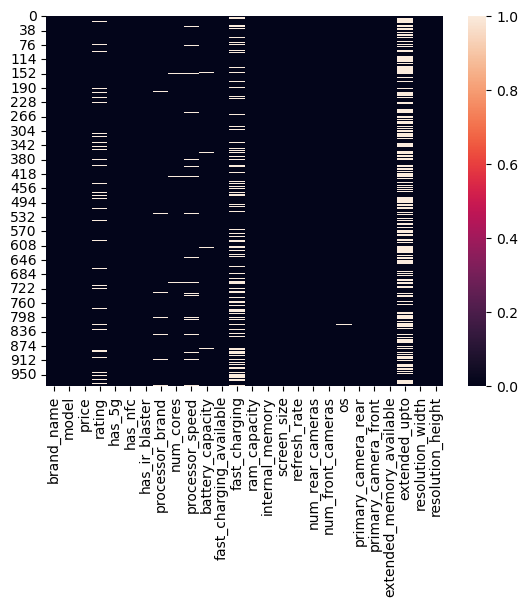

In [47]:
sns.heatmap(df.isnull())

In [49]:
df.duplicated().sum()

0

In [51]:
la=LabelEncoder()

In [53]:
obj=df.select_dtypes(include='object')
non_obj=df.select_dtypes(exclude='object')

In [55]:
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])
    

In [57]:
obj

,brand_name,model,processor_brand,os
0,29,307,9,0
1,29,327,9,0
2,36,532,2,0
3,25,198,9,0
4,33,415,1,0
...,...,...,...,...
975,25,180,9,0
976,10,87,9,0
977,32,380,1,0
978,25,205,9,0


In [59]:
obj=obj.astype('int')

In [61]:
df=pd.concat([obj,non_obj],axis=1)

In [63]:
data=df.interpolate(method='linear')
df

,brand_name,model,processor_brand,os,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,29,307,9,0,54999,89.0,True,True,False,8.0,...,6.70,120,3,1.0,50.0,16.0,0,NaN,1440,3216
1,29,327,9,0,19989,81.0,True,False,False,8.0,...,6.59,120,3,1.0,64.0,16.0,1,1024.0,1080,2412
2,36,532,2,0,16499,75.0,True,False,False,8.0,...,6.60,90,3,1.0,50.0,13.0,1,1024.0,1080,2408
3,25,198,9,0,14999,81.0,True,False,False,8.0,...,6.55,120,3,1.0,50.0,16.0,1,1024.0,1080,2400
4,33,415,1,0,24999,82.0,True,False,False,8.0,...,6.70,120,3,1.0,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,25,180,9,0,34990,83.0,True,False,False,8.0,...,6.67,120,3,1.0,64.0,16.0,0,NaN,1080,2460
976,10,87,9,0,14990,75.0,True,False,False,8.0,...,6.50,60,3,1.0,48.0,8.0,1,1024.0,720,1600
977,32,380,1,0,28990,85.0,True,True,True,8.0,...,6.60,144,3,1.0,64.0,16.0,0,NaN,1080,2460
978,25,205,9,0,19990,80.0,True,True,False,8.0,...,6.80,60,3,1.0,108.0,32.0,1,1024.0,1080,2400


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    int32  
 1   model                      980 non-null    int32  
 2   processor_brand            980 non-null    int32  
 3   os                         980 non-null    int32  
 4   price                      980 non-null    int64  
 5   rating                     980 non-null    float64
 6   has_5g                     980 non-null    bool   
 7   has_nfc                    980 non-null    bool   
 8   has_ir_blaster             980 non-null    bool   
 9   num_cores                  980 non-null    float64
 10  processor_speed            980 non-null    float64
 11  battery_capacity           980 non-null    float64
 12  fast_charging_available    980 non-null    int64  
 13  fast_charging              980 non-null    float64

In [67]:
la=LabelEncoder()

In [69]:
bol=df.select_dtypes(include='bool')
non_bol=df.select_dtypes(exclude='bool')
for i in range(0,bol.shape[1]):
    bol.iloc[:,i]=la.fit_transform(bol.iloc[:,i])

C:\Users\hp\AppData\Local\Temp\ipykernel_25868\1432614773.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1

In [71]:
bol=bol.astype('int')
data=pd.concat([bol,non_bol],axis=1)


In [85]:
data=df.interpolate(method='linear')
df

,brand_name,model,processor_brand,os,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
1,29,327,9,0,19989,81.0,True,False,False,8.0,...,6.59,120,3,1.0,64.0,16.0,1,1024.0,1080,2412
2,36,532,2,0,16499,75.0,True,False,False,8.0,...,6.60,90,3,1.0,50.0,13.0,1,1024.0,1080,2408
5,36,576,9,0,16999,80.0,True,True,False,8.0,...,6.60,120,3,1.0,50.0,8.0,1,1024.0,1080,2408
10,33,413,9,0,18999,82.0,True,False,False,8.0,...,6.72,120,2,1.0,108.0,16.0,1,1024.0,1080,2400
13,43,698,9,0,16990,80.0,True,False,False,8.0,...,6.58,120,3,1.0,50.0,16.0,1,1024.0,1080,2408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,36,525,13,0,9990,63.0,False,False,False,8.0,...,6.40,60,3,1.0,13.0,8.0,1,512.0,720,1560
961,30,254,1,0,13990,72.0,True,False,False,8.0,...,6.56,90,2,1.0,13.0,8.0,1,1024.0,720,1612
962,6,57,5,0,14999,84.0,False,True,False,8.0,...,6.30,60,3,1.0,108.0,32.0,1,1024.0,1080,2340
970,33,498,11,0,8720,64.0,False,False,False,8.0,...,6.50,60,1,1.0,8.0,5.0,1,1024.0,720,1600


In [87]:
data=df.interpolate(method='linear')
df

,brand_name,model,processor_brand,os,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
1,29,327,9,0,19989,81.0,True,False,False,8.0,...,6.59,120,3,1.0,64.0,16.0,1,1024.0,1080,2412
2,36,532,2,0,16499,75.0,True,False,False,8.0,...,6.60,90,3,1.0,50.0,13.0,1,1024.0,1080,2408
5,36,576,9,0,16999,80.0,True,True,False,8.0,...,6.60,120,3,1.0,50.0,8.0,1,1024.0,1080,2408
10,33,413,9,0,18999,82.0,True,False,False,8.0,...,6.72,120,2,1.0,108.0,16.0,1,1024.0,1080,2400
13,43,698,9,0,16990,80.0,True,False,False,8.0,...,6.58,120,3,1.0,50.0,16.0,1,1024.0,1080,2408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,36,525,13,0,9990,63.0,False,False,False,8.0,...,6.40,60,3,1.0,13.0,8.0,1,512.0,720,1560
961,30,254,1,0,13990,72.0,True,False,False,8.0,...,6.56,90,2,1.0,13.0,8.0,1,1024.0,720,1612
962,6,57,5,0,14999,84.0,False,True,False,8.0,...,6.30,60,3,1.0,108.0,32.0,1,1024.0,1080,2340
970,33,498,11,0,8720,64.0,False,False,False,8.0,...,6.50,60,1,1.0,8.0,5.0,1,1024.0,720,1600


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356 entries, 1 to 976
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 356 non-null    int32  
 1   model                      356 non-null    int32  
 2   processor_brand            356 non-null    int32  
 3   os                         356 non-null    int32  
 4   price                      356 non-null    int64  
 5   rating                     356 non-null    float64
 6   has_5g                     356 non-null    bool   
 7   has_nfc                    356 non-null    bool   
 8   has_ir_blaster             356 non-null    bool   
 9   num_cores                  356 non-null    float64
 10  processor_speed            356 non-null    float64
 11  battery_capacity           356 non-null    float64
 12  fast_charging_available    356 non-null    int64  
 13  fast_charging              356 non-null    float64
 14 

<Axes: >

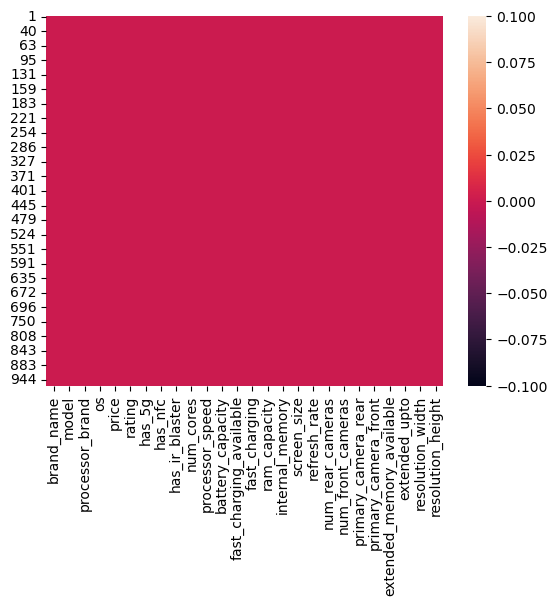

In [97]:
sns.heatmap(data.isnull())

In [99]:
data.corr()

,brand_name,model,processor_brand,os,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
brand_name,1.000000,0.728319,-0.067863,-0.130886,-0.087457,-0.000582,-0.053814,-0.087154,0.396212,-0.073092,...,-0.098889,-0.092617,0.131986,0.020958,-0.005317,-0.018811,NaN,-0.114466,-0.018833,0.070615
model,0.728319,1.000000,-0.005768,-0.093245,-0.073044,-0.015640,-0.016026,-0.147670,0.446927,-0.068469,...,-0.022258,0.042436,0.094742,-0.014917,0.010376,-0.043806,NaN,-0.063410,0.054122,0.077647
processor_brand,-0.067863,-0.005768,1.000000,0.046684,-0.046755,-0.140700,-0.317062,-0.103863,-0.070517,0.027618,...,0.021955,-0.036540,0.052238,0.010314,-0.034364,-0.033353,NaN,-0.170721,-0.124061,-0.071293
os,-0.130886,-0.093245,0.046684,1.000000,0.799898,0.027602,-0.045029,0.126902,0.098581,0.005658,...,0.076441,0.070032,-0.001873,-0.005658,-0.010877,-0.012070,NaN,-0.082477,0.028278,0.049706
price,-0.087457,-0.073044,-0.046755,0.799898,1.000000,0.411226,0.167519,0.374189,0.010849,0.079618,...,0.060356,0.204207,0.120486,0.055428,0.130104,0.187959,NaN,0.048080,0.180670,0.299782
rating,-0.000582,-0.015640,-0.140700,0.027602,0.411226,1.000000,0.423466,0.373459,0.093332,0.314157,...,0.100269,0.429709,0.441745,0.073919,0.653288,0.591735,NaN,0.243329,0.341865,0.603875
has_5g,-0.053814,-0.016026,-0.317062,-0.045029,0.167519,0.423466,1.000000,0.173036,0.047976,0.090441,...,0.162487,0.513642,-0.125296,-0.090441,0.240848,0.104541,NaN,0.334888,0.107939,0.244850
has_nfc,-0.087154,-0.147670,-0.103863,0.126902,0.374189,0.373459,0.173036,1.000000,-0.168451,0.044584,...,0.052321,0.158473,0.073349,0.030283,0.116156,0.162917,NaN,0.171687,0.143068,0.190504
has_ir_blaster,0.396212,0.446927,-0.070517,0.098581,0.010849,0.093332,0.047976,-0.168451,1.000000,0.057392,...,0.075817,0.116199,0.168850,-0.057392,0.244944,-0.027435,NaN,-0.140881,0.151485,0.139545
num_cores,-0.073092,-0.068469,0.027618,0.005658,0.079618,0.314157,0.090441,0.044584,0.057392,1.000000,...,0.025617,0.123727,0.152536,0.011364,0.198793,0.127143,NaN,0.107034,0.134733,0.151831


# Create Model

In [101]:
x=data.drop(['has_5g'],axis=1)
y=data['has_5g']

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [168]:
model1=RandomForestClassifier()
model2=DecisionTreeClassifier()
model3=GradientBoostingClassifier()
model4=KNeighborsClassifier()
model5=GaussianNB()

In [139]:
def pred(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print(classification_report(pre,y_test))

In [156]:
pred(model1)

              precision    recall  f1-score   support

       False       0.95      0.98      0.97        43
        True       0.96      0.93      0.95        29

    accuracy                           0.96        72
   macro avg       0.96      0.95      0.96        72
weighted avg       0.96      0.96      0.96        72



In [158]:
pred(model2)

              precision    recall  f1-score   support

       False       0.95      0.95      0.95        44
        True       0.93      0.93      0.93        28

    accuracy                           0.94        72
   macro avg       0.94      0.94      0.94        72
weighted avg       0.94      0.94      0.94        72



In [162]:
pred(model3)

              precision    recall  f1-score   support

       False       0.93      0.98      0.95        42
        True       0.96      0.90      0.93        30

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72



In [164]:
pred(model4)

              precision    recall  f1-score   support

       False       0.59      0.84      0.69        31
        True       0.82      0.56      0.67        41

    accuracy                           0.68        72
   macro avg       0.71      0.70      0.68        72
weighted avg       0.72      0.68      0.68        72



In [166]:
pred(model5)

              precision    recall  f1-score   support

       False       0.61      0.84      0.71        32
        True       0.82      0.57      0.68        40

    accuracy                           0.69        72
   macro avg       0.72      0.71      0.69        72
weighted avg       0.73      0.69      0.69        72

